### Goal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd

import matplotlib.pyplot as plt

import plotting as plotting

### TODO: update this path

In [3]:
root = "/Users/michaelmoret/tinyverse/krap/data/24-11-25-bis/triple/"

### From here; automatic run

In [4]:
for file in os.listdir(root):
    if file.endswith(".txt"):
        print(file)

20241126$25^DAN_IHNY_SDS_WAX7_0.02$triple.txt
20241126$25^DAN_IHNY_SDS_WAX7_phos$triple.txt
20241126$25^DAN_IHNY_SDS_WAX7_0.04$triple.txt
20241126$25^DAN_IHNY_SDS_WAX7_0.01$triple.txt


In [5]:
savepath = f"{root}plots/"
os.makedirs(savepath, exist_ok=True)

In [6]:
all_dfs = []
for file in os.listdir(root):
    if file.endswith(".txt"):
        df = pd.read_csv(root + file, 
                         sep="\t", 
                         header=None)

        # clean the df
        if "single" in file:
            print("\ncleaning SINGLE")
            print(file)
            df = plotting.clean_single(df)
        elif "triple" in root:
            print("\ncleaning TRIPLE")
            print(file)
            df = plotting.clean_triple(df)
        else:
            raise ValueError("Unknown type of experiment")
        
        splitted_name = file.split("$")
        # get the experiments; i.e. not the date
        # not the single or triple
        splitted_name = splitted_name[1:-1]
        # add the experiment name in the dataframe
        all_names = []
        for entries in splitted_name:
            times_name = entries.split("^")
            _times = int(times_name[0])
            _name = times_name[1]
            all_names += [_name] * _times
        df["Name"] = all_names
        # remove nan
        df = df.dropna()
        all_dfs.append(df)
        
# merge df
df_merged = pd.concat(all_dfs)
df_merged.head(5)


cleaning TRIPLE
20241126$25^DAN_IHNY_SDS_WAX7_0.02$triple.txt

cleaning TRIPLE
20241126$25^DAN_IHNY_SDS_WAX7_phos$triple.txt

cleaning TRIPLE
20241126$25^DAN_IHNY_SDS_WAX7_0.04$triple.txt

cleaning TRIPLE
20241126$25^DAN_IHNY_SDS_WAX7_0.01$triple.txt


,RECORD,CROSS-SECTIONAL AREA,MEAN DIAMETER,MAX DIAMETER,MIN DIAMETER,ELASTIC EMOD,ELASTIC GRADIENT,ELASTIC EXT,ELASTIC STRESS,PLATEAU LOAD,...,WORK 25%,YIELD EXT,POSTYIELD GRADIENT,BREAK EXT,BREAK LOAD,BREAK STRESS,Break Stress,TOTAL WORK,TOUGHNESS,Name
1,52.0,2406.7,55.8,61.0,50.3,4.365000e+09,34.80,2.63,0.01251,31.16,...,0.002259,27.23,2.064,52.62,47.60,0.01978,193.975537,0.005545,74870000.0,DAN_IHNY_SDS_WAX7_0.02
2,53.0,3910.0,72.9,86.9,57.4,4.284000e+09,56.82,2.90,0.01311,52.52,...,0.003697,21.73,3.810,42.50,74.00,0.01893,185.639884,0.006983,59440000.0,DAN_IHNY_SDS_WAX7_0.02
3,54.0,5308.4,88.1,108.4,62.4,4.047000e+09,71.44,2.90,0.01258,66.82,...,0.004796,26.04,3.886,49.79,94.15,0.01774,173.969971,0.010780,66250000.0,DAN_IHNY_SDS_WAX7_0.02
4,55.0,3767.8,70.9,80.4,59.7,3.956000e+09,50.36,2.85,0.01233,47.63,...,0.003355,28.77,3.040,56.25,74.85,0.01987,194.858136,0.009091,79970000.0,DAN_IHNY_SDS_WAX7_0.02
7,58.0,2013.9,50.6,54.0,47.5,3.998000e+09,27.10,2.84,0.01249,25.48,...,0.001815,25.63,1.719,49.70,37.45,0.01860,182.403690,0.004110,67400000.0,DAN_IHNY_SDS_WAX7_0.02


Statistical significance between DAN_IHNY_SDS_WAX7_phos and DAN_IHNY_SDS_WAX7_0.01: p = 0.0493


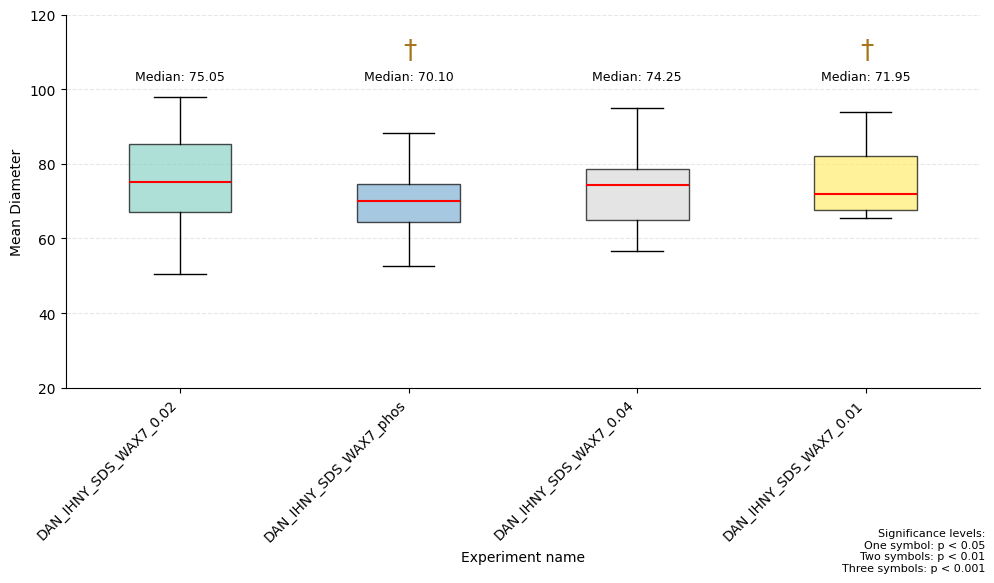

In [7]:
header = 'MEAN DIAMETER'
ymin = 20
ymax = 120
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

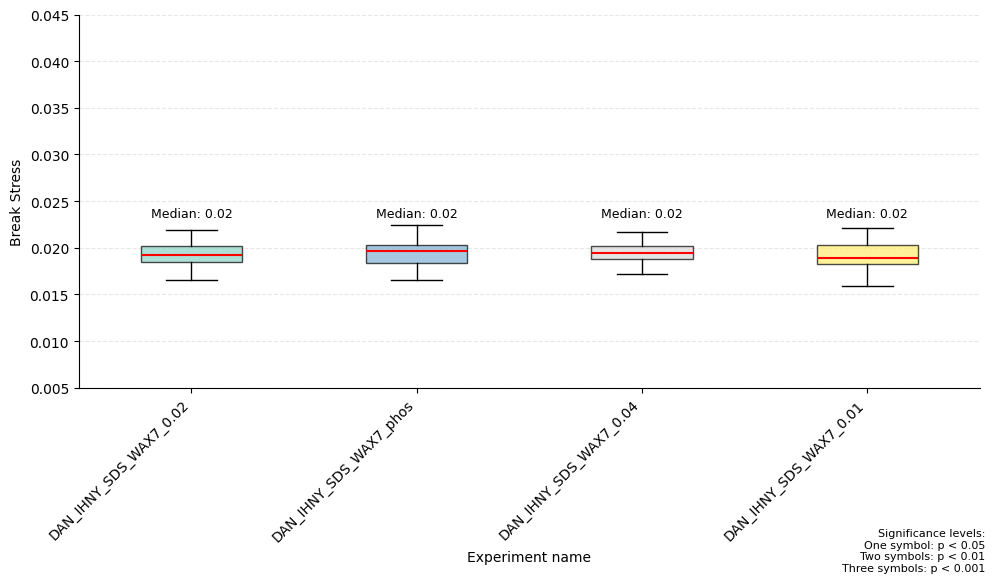

In [8]:
header = 'BREAK STRESS'
ymin = 0.005
ymax = 0.045
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

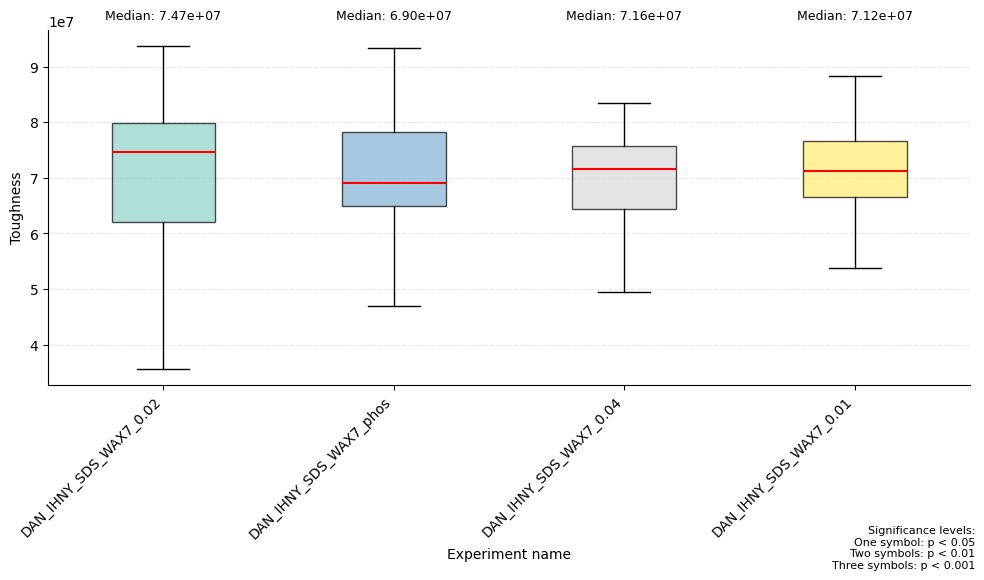

In [9]:
header = 'TOUGHNESS'
ymin = None
ymax = None
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between DAN_IHNY_SDS_WAX7_phos and DAN_IHNY_SDS_WAX7_0.01: p = 0.0335


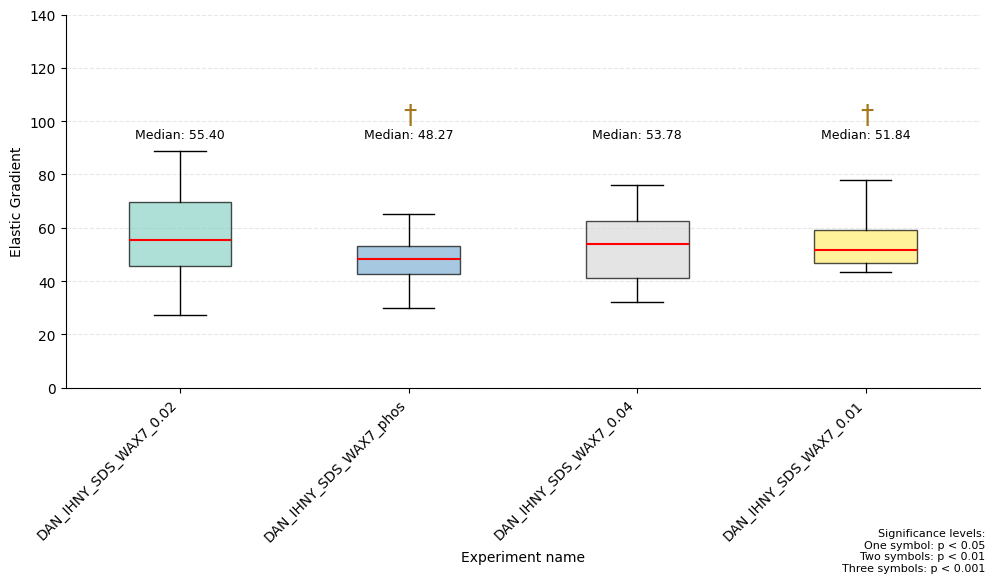

In [10]:
header = 'ELASTIC GRADIENT'
ymin = 0
ymax =  140
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

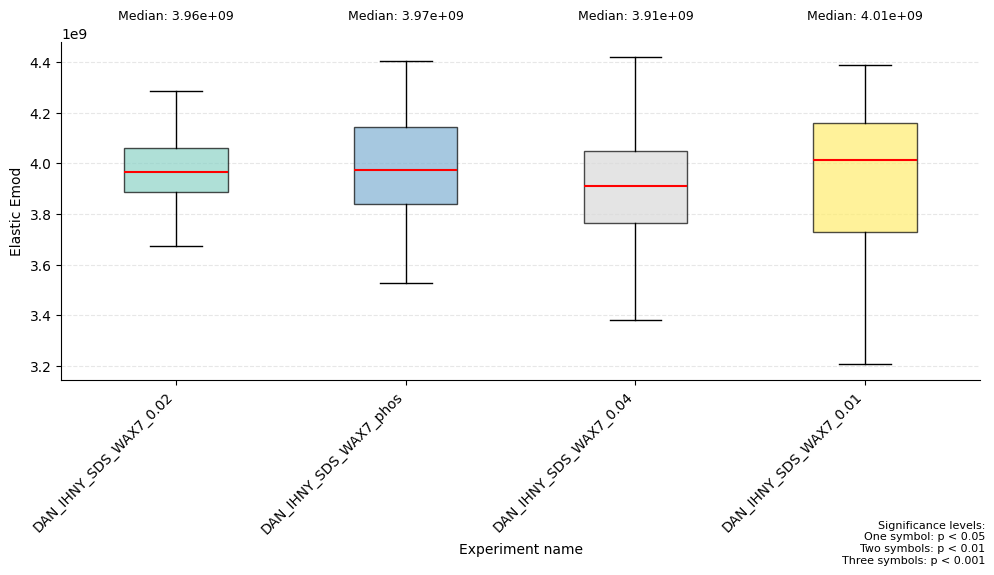

In [11]:
header = 'ELASTIC EMOD'
ymin = None
ymax =  None
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()